In [12]:
import corner
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# define the directory where the run is stored
dir='/Users/michielm/HAT-P-12b/NIRSPEC_HST/final_TEATRO/'

In [7]:
# define the string with name-labels
# If you did not run the post-processing with pew=.true. you have to define the string of names yourself
with open(dir+'/pew_output.dat') as file:
    data1 = [[digit for digit in line.split()] for line in file]

ndim=len(data1[1])-4

names=data1[0][1:ndim+1]
print(names)

['TP0', 'Rp', 'CO2', 'CO', 'CH4', 'H2O', 'SO2', 'H2S', 'cloud1:Ptop']


In [8]:
# read the posterior distribution from the .txt file
with open(dir+'/.txt') as file:
    data1 = [[digit for digit in line.split()] for line in file]

nsamples=len(data1)

data=[]
weights=[]
for i in range(0,nsamples):
    data.append([])
    for j in range(2,ndim+2):
        data[i].append(float(data1[i][j]))
    weights.append(float(data1[i][0]))


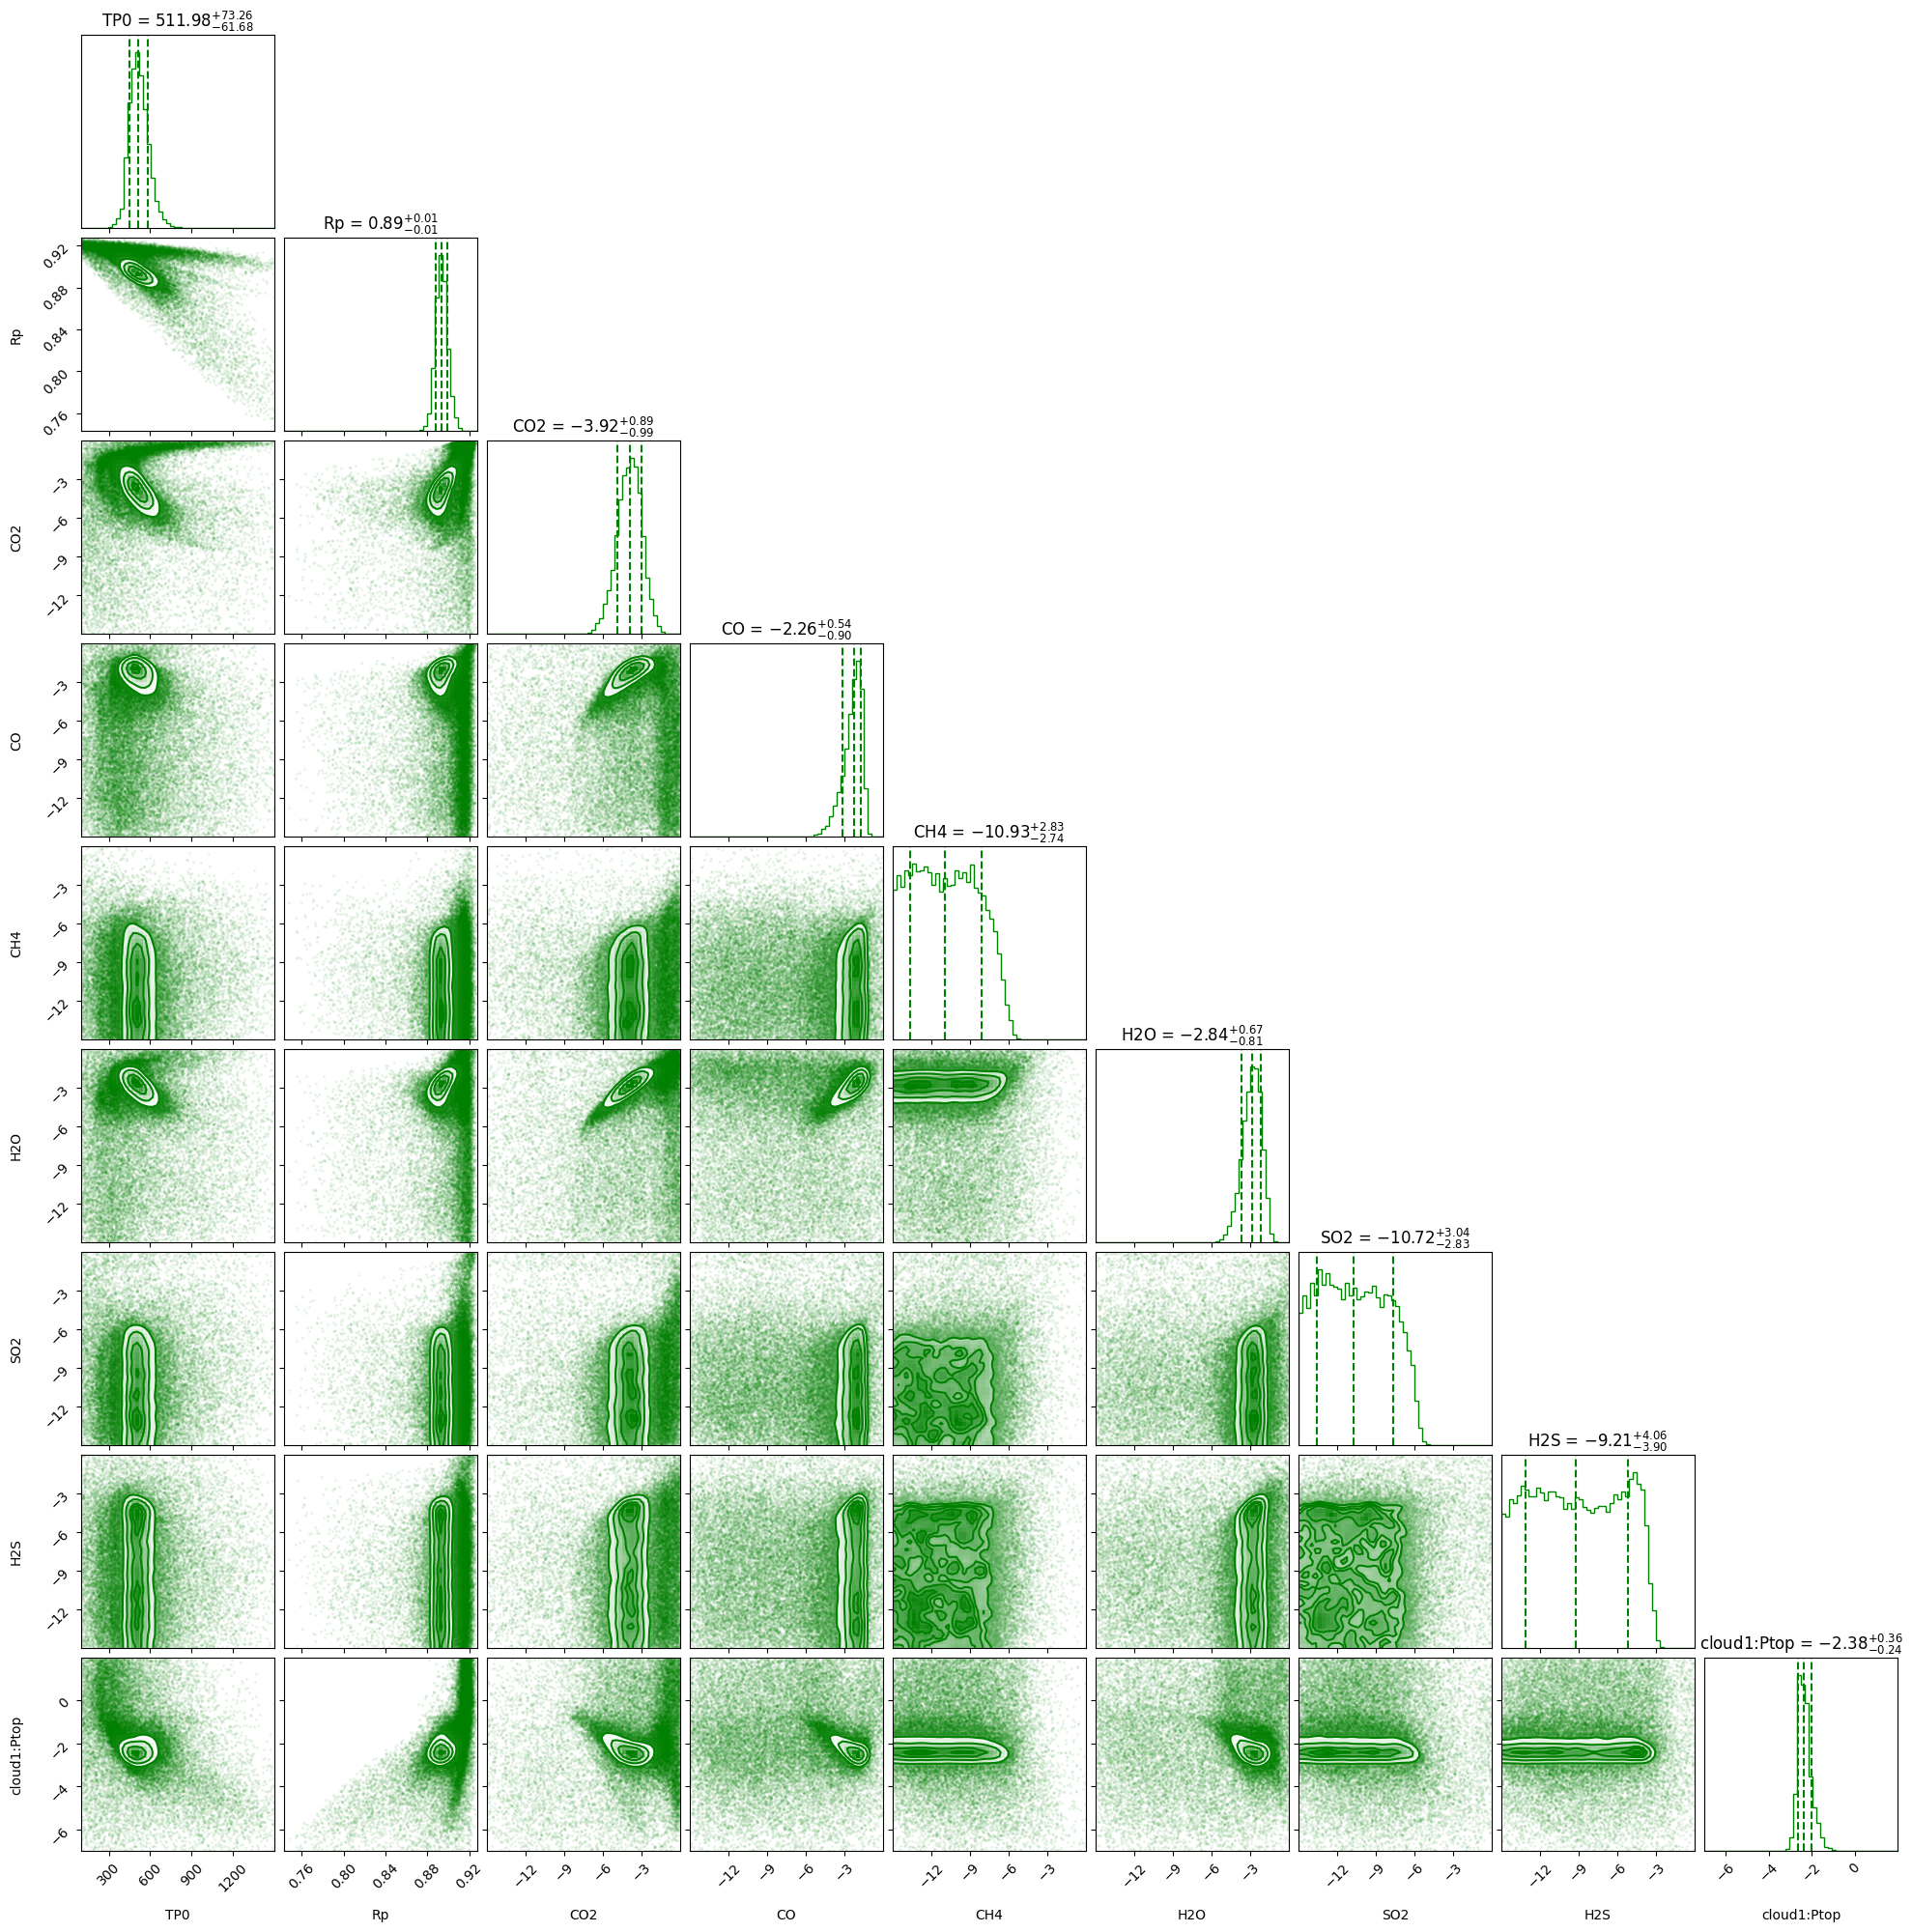

In [10]:
# make the cornerplot
figure=corner.corner(np.array(data),labels=names,
                       quantiles=[0.16, 0.5, 0.84],smooth=1.0,weights=np.array(weights),bins=50,
                       show_titles=True, title_kwargs={"fontsize": 12},color='g')

In [11]:
# save the figure as pdf (best for papers because vector graphics)
figure.savefig("cornerplot.pdf")